In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.display import HTML

# The steps involved in solving a problem with machine learning techniques are:
1. Data Processing
2. Define "error"
3. Split the data into two parts : Training data and Testing data
4. Train the model: This step involves "learning" the target function from the given training data. Choose the appropriate Machine Lerning algorithm for the problem. Train it on the data. Test the model with the testing data
5. Prediction : Obtain the predicted values for the given input and visualize the results

# Step 1 : Data Preprocessing


Load the dataset

In [3]:
# The boston house data is already present in the Sklearn library. We only need to import it
boston=load_boston()

# Describe the data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Put the data into Pandas Data Frames
features = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
features['AGE']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: AGE, Length: 506, dtype: float64

In [7]:
# Put the targets coressponding to the data into Pandas Data Frames. Here target coressponds to the price of the house
price = pd.DataFrame(boston.target, columns=['PRICE'])

In [8]:
price

,PRICE
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
# Let us find the max and min price of the houses
max(price['PRICE'])

50.0

In [10]:
min(price['PRICE'])

5.0

In [11]:
# Concatenate features and target into a single Dataframe
# axis=1 makes it concatenate column wise

df = pd.concat([features, price],axis=1)

In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [13]:
# Use describe to generate a summary of the dataset
# Use round(decimals=2) to set the precision to 2 decimal places

df.describe().round(decimals=2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [14]:
# calculate the correlation between every column on the data

corr = df.corr('pearson')
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [15]:
# Take the absolute values of correlations

corrs = [abs(corr[attr]['PRICE']) for attr in list(features)]
corrs

[0.3883046085868114,
 0.3604453424505447,
 0.483725160028373,
 0.1752601771902975,
 0.4273207723732817,
 0.6953599470715389,
 0.3769545650045959,
 0.24992873408590394,
 0.3816262306397776,
 0.46853593356776646,
 0.507786685537561,
 0.33346081965706653,
 0.7376627261740143]

In [16]:
# Make a list of pairs [(corr, features)]

l = list(zip(corrs, list(features)))
l

[(0.3883046085868114, 'CRIM'),
 (0.3604453424505447, 'ZN'),
 (0.483725160028373, 'INDUS'),
 (0.1752601771902975, 'CHAS'),
 (0.4273207723732817, 'NOX'),
 (0.6953599470715389, 'RM'),
 (0.3769545650045959, 'AGE'),
 (0.24992873408590394, 'DIS'),
 (0.3816262306397776, 'RAD'),
 (0.46853593356776646, 'TAX'),
 (0.507786685537561, 'PTRATIO'),
 (0.33346081965706653, 'B'),
 (0.7376627261740143, 'LSTAT')]

In [17]:
# Sort the list of pairs in reverse/descending order,
# with the correlation value as the key for sorting
l.sort(key = lambda x : x[0], reverse = True)
l

[(0.7376627261740143, 'LSTAT'),
 (0.6953599470715389, 'RM'),
 (0.507786685537561, 'PTRATIO'),
 (0.483725160028373, 'INDUS'),
 (0.46853593356776646, 'TAX'),
 (0.4273207723732817, 'NOX'),
 (0.3883046085868114, 'CRIM'),
 (0.3816262306397776, 'RAD'),
 (0.3769545650045959, 'AGE'),
 (0.3604453424505447, 'ZN'),
 (0.33346081965706653, 'B'),
 (0.24992873408590394, 'DIS'),
 (0.1752601771902975, 'CHAS')]

In [18]:
# Unzip pairs to two lists
# zip(*l) - takes a list that looks like [[a,b,c],[d,e,f],[g,h,i]]
# and returns [[a,d,g],[b,e,h],[c,f,i]]

corrs, labels = list(zip(*l))

In [19]:
# Print the correlations and labels value seperately
corrs

(0.7376627261740143,
 0.6953599470715389,
 0.507786685537561,
 0.483725160028373,
 0.46853593356776646,
 0.4273207723732817,
 0.3883046085868114,
 0.3816262306397776,
 0.3769545650045959,
 0.3604453424505447,
 0.33346081965706653,
 0.24992873408590394,
 0.1752601771902975)

In [20]:
labels

('LSTAT',
 'RM',
 'PTRATIO',
 'INDUS',
 'TAX',
 'NOX',
 'CRIM',
 'RAD',
 'AGE',
 'ZN',
 'B',
 'DIS',
 'CHAS')

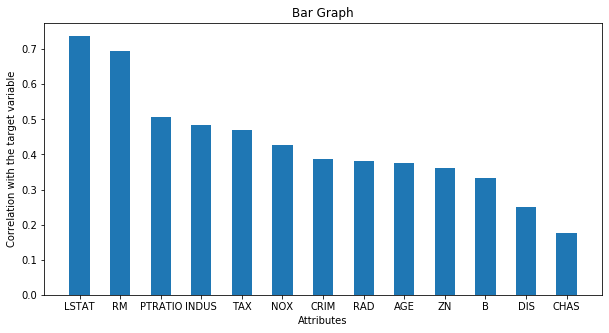

In [21]:
# Plot correlations with respect to the target variables as a bar graph
index = np.arange(len(labels))
plt.figure(figsize=(10,5))
plt.bar(index, corrs, width=0.5)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the target variable')
plt.title('Bar Graph')
plt.xticks(index,labels)
plt.show()

We observe from the bar graph generated above, that LSTAT and RM have the two highest absolute correlation values 

# Normalize the data
Normalize the data with MinMaxScalar

In [22]:
X = df['LSTAT'].values
Y = df['PRICE'].values

In [23]:
# Before normalization

print(Y[:5])

[24.  21.6 34.7 33.4 36.2]


In [24]:
x_scalar = MinMaxScaler()
X = x_scalar.fit_transform(X.reshape(-1,1))
X = X[:, -1]
y_scalar = MinMaxScaler()
Y = y_scalar.fit_transform(Y.reshape(-1,1))
Y = Y[:, -1]

In [25]:
# After normalization

print(Y[:5])

[0.42222222 0.36888889 0.66       0.63111111 0.69333333]


# Step 2 : Mean Square Error Calculation


In [26]:
# calculating the mean sqaure error where,
# m = slope, c = intercept, x = input data, t = true value 

def error(m,x,c,t):      
    n = x.size
    e = sum((m*x+c - t)**2)
    return e * 1/(2*n)

# Step 3 : Split the data

1. Split the data into training and testing data : The data is split before the training step and the samples in the sets of data do not change during the course of the training process
2. Cross Valisdation : Split the data into equal chunks. At each step of training, choose one chunk of data as training data and other chunks as testing data. This is a method to remove the overfitting in the data

# Splitting data into fixed sets

In [27]:
# 0.2 indicates 20% of the data is randomly sampled as testing data

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [28]:
# Update the weights

def update(m, x, c, t, learning_rate):
    grad_m = sum(2 * ((m * x + c)-t) * x)
    grad_c = sum(2 * ((m * x + c)-t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m, c

# Error Threshold 
If the error falls below the threshold, the gradient descent process is stopped and the weights are returned

In [29]:
# Define the gradient descent function

def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = list()
    mc_values = list()
    for i in range(iterations):
        e = error(m, x, c, t)
        if e < error_threshold:
            print('Error less than the threshold. Stopping gradient descent')
            break
        error_values.append(e)
        m, c = update(m, x, c, t, learning_rate)
        mc_values.append((m, c))
    return m, c, error_values, mc_values

In [30]:
# Initializing the parameters and calling the gradient descent function

init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001

m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

Animation may take a minute or more to get processed.
Therefore select every 5th value (or a larger interval if you wish) to reduce the processing time

In [31]:
# As the number of iterations increases, change in the line are less noticable
# Inorder to reduce the processing timw for the animation, it is advised to choose smaller values

mc_value_anim = mc_values[0:250:5]

# Step 4 : Plotting the regression line upon the training data set

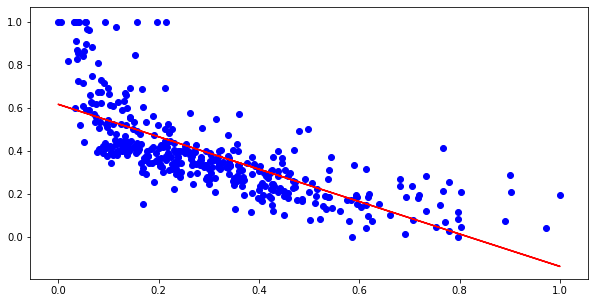

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(xtrain, ytrain, color='b')
plt.plot(xtrain, (m * xtrain + c),color='r')

# Plotting error values

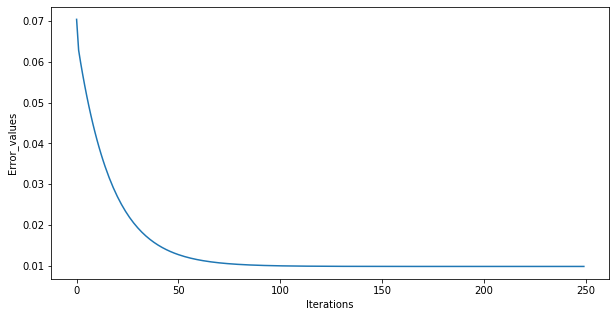

In [33]:
# Plot the graph between error_values with the number of iterations

index = np.arange(len(error_values))
plt.figure(figsize=(10,5))
plt.plot(index,error_values)
plt.xlabel('Iterations')
plt.ylabel('Error_values')
plt.show()

# Step 5 : Prediction
After Step 4, we obtain the final value of m and c. Using these values we obtain the predictions for the values in the testing data

We will then evaluate the model with certain metrics such as RMSE, R2 score etc. The choice of these metrics will depend on the type of data (Categorical, continuous etc.)

# Prediction

In [34]:
# Calculate the predictions on the test set as a vectorized operation

predicted = (m * xtest) + c

In [35]:
# Compute MSE for the predicted values on the testing set

mean_squared_error(ytest, predicted)

0.01628874770568071

In [36]:
# Put xtest, ytest and predicted values into a single DataFrame so that we 
# see the predicted values alongside the testing set

p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns=['x', 'target_y', 'predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.222682,0.322222,0.449261
1,0.629967,0.162222,0.142737
2,0.031457,0.697778,0.593178
3,0.318433,0.308889,0.377199
4,0.202815,0.346667,0.464214


# Plot the predicted values against the target values
1. Predicted values are represented by the red colored line
2. Target values are represented by blue colored points

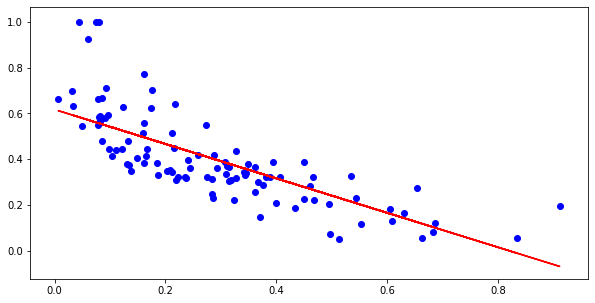

In [37]:
plt.figure(figsize=(10,5))
plt.scatter(xtest, ytest, color='b')
plt.plot(xtest, predicted, color='r')

# Revert normalization to obtain the predicted price of the house in their original representation
The predicted values are in the range 0 - 1. This is not very useful to us when we want to obtain the price.
Use inverse_tranform to scale the values back to original representation

In [38]:
# Reshape to change the shape that is required by the scalar
predicted = predicted.reshape(-1,1)
xtest = xtest.reshape(-1,1)
ytest = ytest.reshape(-1,1)

# We will make use of x_scalar and y_scalar objects of MinMaxScalar for scaling 
xtest_scaled = x_scalar.inverse_transform(xtest)    
ytest_scaled = y_scalar.inverse_transform(ytest)
predicted_scaled = y_scalar.inverse_transform(predicted)

# This is to remove extra dimensions
xtest_scaled = xtest_scaled[:, -1]
ytest_scaled = ytest_scaled[:, -1]
predicted_scaled = predicted_scaled[:, -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)),columns=['x','target_y','predicted_y'])
p.head()

,x,target_y,predicted_y
0,9.80,19.5,25.216763
1,24.56,12.3,11.423153
2,2.87,36.4,31.693032
3,13.27,18.9,21.973957
4,9.08,20.6,25.889622
